<a href="https://colab.research.google.com/github/debojit11/ml_nlp_dl_transformers/blob/main/ML_week_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 10: K-Means Clustering (Unsupervised Learning)

# **SECTION 1: Welcome & Objectives**

In [1]:
print("Welcome to Week 10!")
print("This week, you'll:")
print("- Learn about K-Means: an unsupervised learning algorithm for clustering")
print("- Apply K-Means to group text messages without labels")
print("- Use Elbow Method to choose the best K")
print("- Visualize clustering results using PCA")

Welcome to Week 10!
This week, you'll:
- Learn about K-Means: an unsupervised learning algorithm for clustering
- Apply K-Means to group text messages without labels
- Use Elbow Method to choose the best K
- Visualize clustering results using PCA


# **SECTION 2: Why Clustering?**

### Why Clustering?
In many real-world NLP problems, we don’t have labels.

K-Means helps us:
- Group similar text messages together
- Discover hidden patterns or topics
- Use clusters as features for downstream models

# **SECTION 3: Load & Preprocess SMS Data**

In [2]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
data = pd.read_csv(url, sep='\t', names=["label", "message"])

In [5]:
data

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(data['message'])

# 🧭 Week 10 – K-Means Clustering (Unsupervised Learning)

---

## 🤔 Why Unsupervised Learning?

Sometimes, we have **no labels**.  
But we still want the model to **find patterns or groups** in the data.

Examples:
- Grouping similar text messages
- Topic modeling on articles
- Clustering user reviews

---

## 📌 What is K-Means?

K-Means groups data points into **K clusters**, where:
- Each point belongs to the cluster with the **closest mean (centroid)**
- The algorithm tries to **minimize the within-cluster distance**

---

## ⚙️ How It Works (Step-by-Step)

1. Choose K (number of clusters)
2. Randomly initialize K centroids
3. Assign each point to the closest centroid
4. Update centroids based on assigned points
5. Repeat steps 3–4 until convergence

---

## 📐 Math Intuition

It minimizes the **within-cluster sum of squares (WCSS)**:

$$
\text{WCSS} = \sum_{k=1}^{K} \sum_{x_i \in C_k} \|x_i - \mu_k\|^2
$$

Where:
- $( C_k $) = points in cluster k
- $( \mu_k $) = centroid of cluster k

---

# **SECTION 4: Run K-Means Clustering**

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

## 🧠 Choosing K (Elbow Method)

Try different values of K and plot **inertia (WCSS)**.  
Look for the **"elbow"** point where improvement slows down.

> It’s a tradeoff between underfitting (too few clusters) and overfitting (too many).

---

## 📝 Example: Clustering SMS Messages

We’ll apply K-Means on the **TF-IDF vectors** of SMS messages to see if it can group similar messages together — even without labels.

---

## Elbow Method

In [8]:
inertia = []
k_values = range(1, 11)

In [9]:
for k in k_values:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

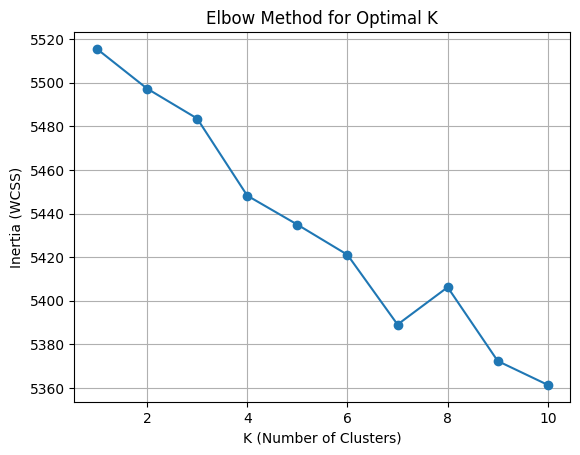

In [10]:
plt.plot(k_values, inertia, marker='o')
plt.xlabel("K (Number of Clusters)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.grid(True)
plt.show()

### Let’s pick K = 2 (since we know it's ham vs spam)

In [11]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X)

In [12]:
data['cluster'] = clusters
print(data[['message', 'cluster']].head())

                                             message  cluster
0  Go until jurong point, crazy.. Available only ...        0
1                      Ok lar... Joking wif u oni...        0
2  Free entry in 2 a wkly comp to win FA Cup fina...        1
3  U dun say so early hor... U c already then say...        0
4  Nah I don't think he goes to usf, he lives aro...        0


# **SECTION 5: Visualize with PCA**

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X.toarray())

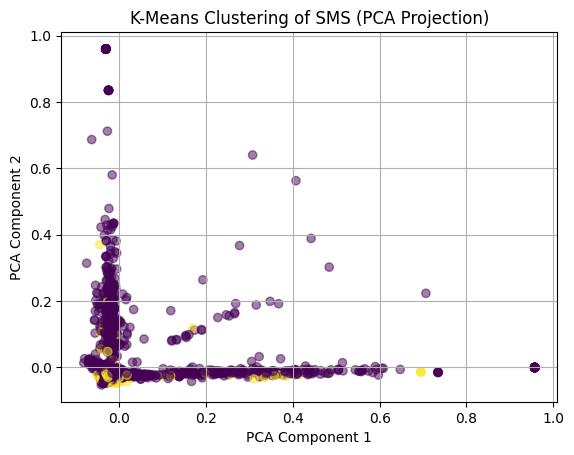

In [15]:
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.title("K-Means Clustering of SMS (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

## 🧠 Real-World Use Cases in NLP

| Use Case               | Description                                  |
|------------------------|----------------------------------------------|
| Topic Modeling         | Group documents/articles by topic            |
| Customer Segmentation  | Cluster user feedback or reviews             |
| Preprocessing Aid      | Use clusters as features for other models    |

---

## ⚠️ Limitations

- K-Means assumes **spherical clusters** of similar size
- Can get stuck in **local minima** (use multiple initializations)
- Not ideal for **non-Euclidean distances** unless modified

---

You now know how to **group text data without any labels** using clustering!  
Next week, we’ll cover **PCA & t-SNE** — powerful tools to **visualize high-dimensional embeddings** and gain insights into your data 🔍🧠

# **SECTION 6: What's Coming Next?**

### What’s Next in Week 11?
Now that you’ve grouped text without labels...

➡️ Next week, we’ll use **PCA** and **t-SNE** not just for clustering,  
but for **visualizing complex embeddings** and gaining deeper insights into your data.  
Especially useful for high-dimensional text like BERT embeddings 🔍🧠

# **SECTION 7: Exercises**

### Exercises:
1. Try different values of `k` and observe cluster distribution.
2. Preprocess the text with stemming/lemmatization before clustering.
3. Compare clusters with true labels (ham vs spam).
4. Visualize using `t-SNE` instead of PCA for better separation.